1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(123)

Text(0.5, 1.0, 'Cars During Noon')

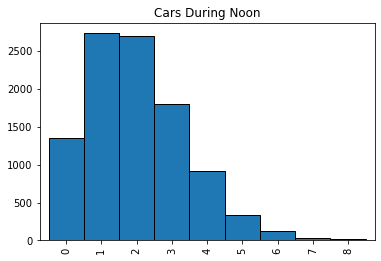

In [2]:
cars_per_noon = 2
pd.Series(stats.poisson(cars_per_noon).rvs(10_000)).value_counts().sort_index().plot.bar(width=1, ec='black')
plt.title('Cars During Noon')

In [3]:
cars = np.random.poisson(cars_per_noon, size = 10_000)
no_cars = (cars == 0).mean()
no_cars

0.1352

In [4]:
three__or_more = cars >= 3
three__or_more.mean()

0.3261

In [5]:
at_least_one = cars >= 1
at_least_one.mean()

0.8648

In [6]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [7]:
stats.poisson(2).sf(2)

0.32332358381693654

In [8]:
stats.poisson(2).sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?

In [9]:
grades = stats.norm(3, .3)
grades.isf(.05) #top 5%
grades.ppf(.95)

3.4934560880854417

In [10]:
grades.ppf(.15) #bottom 15%

2.689069983151863

In [11]:
grades.ppf(.3) #top of 3rd decile

2.842679846187588

In [12]:
grades.isf(.8) #bottom of 3rd decile
# 2.8 GPA would qualify for the scholarship

2.7475136299281258

In [13]:
grades.cdf(3.5)

0.9522096477271853

In [14]:
n_trials = 10_000
gpa = pd.DataFrame(np.random.normal(3, .3, n_trials))

In [15]:
np.percentile(gpa, 95)

3.4907792249246947

In [16]:
np.percentile(gpa, 15)

2.6827098893709644

In [17]:
np.percentile(gpa, 20)

2.7437461558828815

In [18]:
np.percentile(gpa, 30)

2.8439750051137267

In [19]:
gpa_35 = gpa > 3.5
1 - gpa_35.mean()

0    0.9534
dtype: float64

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [20]:
click = .02
n_trials = 4326
stats.binom(n_trials, click).sf(96)

0.13975823631416445

In [21]:
trials = 10_000
today = 4326
click_thru = np.random.choice([0, 1], size = trials * today, p=[.98, .02]).reshape(trials, today)
did_click = click_thru.sum(axis=1) >= 97
did_click.mean()

0.1371

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [22]:
odds_of_correct = .01
stats.binom(60, odds_of_correct).sf(0)

0.45284335760923855

In [23]:
trials = 10_000
questions = 60
answers = np.random.choice([0,1], size = trials * questions, p=[.99, .01]).reshape(trials, questions)
correct = answers.sum(axis=1) >= 1
correct.mean()

0.4527

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that 
there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, 
about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area 
gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [24]:
clean_chance_per_student = .03
visitors = round(.9 * 3 * 22)
days = 1
stats.binom(visitors * days, clean_chance_per_student).sf(0)

0.8342199288437352

In [25]:
days = 2
1 - stats.binom(visitors * days, clean_chance_per_student).sf(0)

0.02748303199257618

In [26]:
days = 7 
1 - stats.binom(visitors * days, clean_chance_per_student).sf(0)

3.4413294569546338e-06

In [27]:
visitors = round(visitors)
trials = 10_000
possible_cleans = np.random.choice([0,1], size = trials * visitors, p = [.97, .03]).reshape(trials, visitors)
actually_cleaned = possible_cleans.sum(axis=1) >= 1
actually_cleaned.mean()

0.8279

In [28]:
num_ppl_two = visitors * 2
two_days_poss = np.random.choice([0,1], size = trials * num_ppl_two, p = [.97, .03]).reshape(trials, num_ppl_two)
actually_cleaned = two_days_poss.sum(axis=1) >= 1
1 - actually_cleaned.mean()

0.025399999999999978

In [29]:
num_ppl_seven = visitors * 7
seven_days_poss = np.random.choice([0,1], size = trials * num_ppl_seven, p = [.97, .03]).reshape(trials, num_ppl_seven)
actually_claned = seven_days_poss.sum(axis=1) >= 1
1 - actually_claned.mean()

0.0

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [30]:
trials = 100_000
m_people = 15
std_people = 3
min_per_order = 2
wait = 10
total_time = 60

line_time = pd.DataFrame(np.random.normal(m_people,std_people , trials))
line_time = line_time * min_per_order + 2
line_time_works = (line_time + wait) < (total_time - 15)
line_time_works.mean()

0    0.69202
dtype: float64

In [31]:
1 - stats.norm(15, 3).sf(16)

0.6305586598182363

In [32]:
stats.norm(15, 3).cdf(16)

0.6305586598182363

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [33]:
from env import host, username, password
from env import get_db_url
e_url = get_db_url('employees')

In [41]:
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > NOW()', e_url)
#salaries2 = pd.read_sql('SELECT * FROM salaries', e_url)
# curr_salary = salaries2.to_date == '9999-01-01'
#pd.to_datetime("now") - pandas 'now' time
# salaries2 = salaries2[curr_salary]

In [40]:
#salaries2.sort_values('to_date')

,emp_no,salary,from_date,to_date
103115,20869,40000,1985-02-17,1985-03-01
2606768,474918,40000,1985-02-10,1985-03-11
2221240,434232,51991,1985-02-26,1985-03-20
228558,34059,54776,1985-02-10,1985-03-23
1781269,287732,40000,1985-04-14,1985-04-17
...,...,...,...,...
1038276,209215,71876,2001-11-03,9999-01-01
2676039,482250,90054,2001-11-18,9999-01-01
1038293,209216,75904,2002-07-17,9999-01-01
2368859,449734,79444,2002-07-14,9999-01-01


In [168]:
avg_sal = salaries.salary.mean()

In [169]:
std_sal = salaries.salary.std()

In [173]:
stats.norm(avg_sal, std_sal).cdf(60_000)

0.24385742480214423

In [174]:
stats.norm(avg_sal, std_sal).sf(95_000)

0.09208819199804053

In [178]:
stats.norm(avg_sal, std_sal).sf(64_999) - stats.norm(avg_sal, std_sal).sf(80_000)

0.33508179968418816

In [180]:
stats.norm(avg_sal, std_sal).isf(.05)

100484.64454102777

In [186]:
#below 60k
num_sal = salaries.count()
(salaries.salary < 60000).sum() / num_sal

emp_no       0.270573
salary       0.270573
from_date    0.270573
to_date      0.270573
dtype: float64

In [187]:
#more than 95k
(salaries.salary > 95000).sum() /num_sal

emp_no       0.108627
salary       0.108627
from_date    0.108627
to_date      0.108627
dtype: float64

In [188]:
#between 65k and 80k
((salaries.salary > 64_999) & (salaries.salary < 80_001)).sum() / num_sal

emp_no       0.325157
salary       0.325157
from_date    0.325157
to_date      0.325157
dtype: float64

In [182]:
np.percentile(salaries.salary, 95)

104225.84999999998